# oob和更多Bagging相关

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.25, n_samples=500)

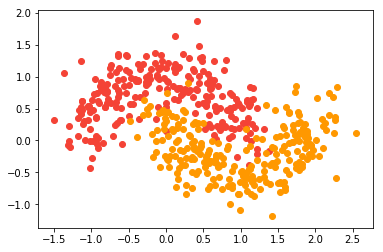

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

#### oob 选择没有没学习的样本作为测试数据集

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bg_clf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500, max_samples=100,
                          bootstrap=True, oob_score=True)
bg_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [6]:
bg_clf.oob_score_

0.94799999999999995

#### bootstrap_features
random_subspaces: 随机选取特征<br>
random_patches: 每个样本独立随机选取特征

In [8]:
bg_clf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500, max_samples=500,
                          bootstrap=True, oob_score=True,
                          bootstrap_features=True,
                          max_features=1)
bg_clf.fit(X, y)
bg_clf.oob_score_

0.82599999999999996

In [9]:
bg_clf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500, max_samples=100,
                          bootstrap=True, oob_score=True,
                          bootstrap_features=True,
                          max_features=1)
bg_clf.fit(X, y)
bg_clf.oob_score_

0.88800000000000001